### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

In [11]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
# %matplotlib inline
import math

* 函数调用说明 numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [2]:
# 目标函数𝑦=𝑠𝑖𝑛2𝜋𝑥——在几个频率值下测试：1,2,3,9
def real_func(x, freq):
    return np.sin(freq*np.pi*x)
    #return np.sin(2*2*np.pi*x)
#     return np.sin(4*2*np.pi*x)
#     return np.sin(8*2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [3]:
# freq=0.2

In [31]:
# # 调整数据点数，进行测试
# #x = np.linspace(0, 1, 10)
# #x = np.linspace(0, 1, 100)
# x = np.linspace(0, 1, 200)

# x_points = np.linspace(0, 1, 1000)
# # 加上正态分布噪音的目标函数的值——在几个噪声方差上进行测试
# y_ = real_func(x, freq)
# #y = [np.random.normal(0, 0.1) + y1 for y1 in y_]
# y = [np.random.normal(0, 0.2) + y1 for y1 in y_]
# #y = [np.random.normal(0, 0.3) + y1 for y1 in y_]
# #y = [np.random.normal(0, 0.5) + y1 for y1 in y_]



def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
#     print('Fitting Parameters:', p_lsq[0])
    
    resu = sum(residuals_func(p_lsq[0], x, y))
    
    # 可视化
    plt.figure(figsize=(8, 6))
    plt.plot(x_points, real_func(x_points, freq), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.title('abs(resi sum)=%f, freq=%.2f, std=%.2f, M=%d'%(abs(resu), freq, std, M))
    plt.legend(loc=1)
    plt.gcf().savefig('poly/freq=%.2f/std=%.2f, M=%d, abs(resi)=%.2f.png'%(freq, std, M, resu))
    plt.close()
#     return p_lsq

In [32]:
freqs=[1, 2, 4, 8]
stds =[0.1, 0.2, 0.3, 0.5]
Ms=[10, 30, 50, 180]

In [33]:
for M in Ms:
    for freq in freqs:
        for std in stds:
            x=np.linspace(0, 1, 200)
            x_points=np.linspace(0, 1, 1000)
            y_=real_func(x, freq)
            y=[np.random.normal(0, std) + y1 for y1 in y_]
            fitting(M)

C:\Users\Hwa\Anaconda3\envs\experiment\lib\site-packages\scipy\optimize\minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 36400.
  warnings.warn(errors[info][0], RuntimeWarning)


### M=10

Fitting Parameters: [ 2.89910950e+03 -1.76216706e+04  4.40036853e+04 -5.92131709e+04
  4.69481160e+04 -2.24082352e+04  6.30759674e+03 -9.76762532e+02
  5.51902678e+01  6.08934446e+00  1.65318366e-02]
resu [ 1.40199172e-01 -2.99032097e-01  2.42748287e-01  2.22600605e-02
 -1.02107156e-01 -1.49877967e-01  3.91018903e-02  7.98778976e-02
 -1.73901417e-01 -5.97757001e-02  1.32679894e-01  2.33962773e-02
  3.47968478e-01 -1.43199485e-02 -1.15644797e-01  1.24158852e-01
 -5.86688216e-02  1.71462809e-01 -2.78850339e-01  2.23704302e-01
 -2.80878353e-01 -1.60406399e-01  1.15413898e-01 -3.51179285e-02
  2.13464584e-01 -2.25883983e-02  2.34596894e-03 -3.12500951e-01
 -1.23050777e-01 -9.95786804e-02 -7.25419994e-02  3.18152245e-01
  9.17251411e-03  1.25622943e-01 -3.78105000e-02  5.98669185e-02
 -1.83276137e-01  1.00252652e-01 -1.78638957e-01 -4.10550573e-02
  2.86238722e-01 -3.28583736e-02  2.14036770e-02  1.68752542e-02
  1.10872612e-01  1.88327937e-01  1.87925130e-01 -3.18504017e-01
  2.83462498e-0

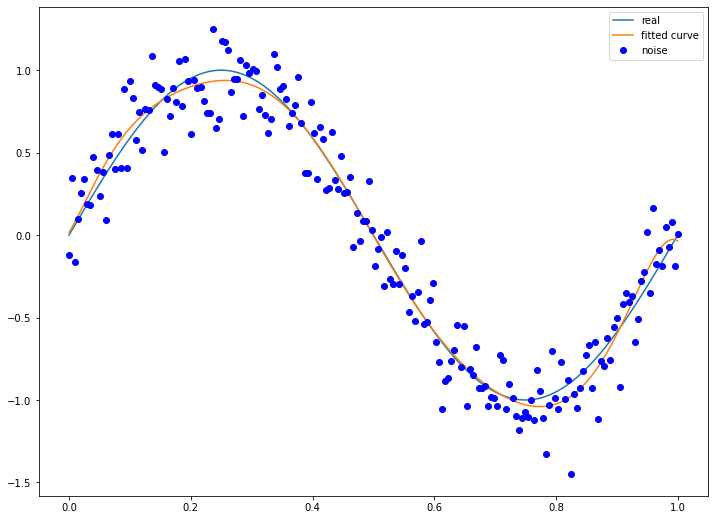

In [59]:
# M=10
p_lsq_0 = fitting(M=10)

### M=30

Fitting Parameters: [-1.33214936e+05  1.59695976e+05  1.08587854e+05  1.56918596e+04
 -1.21324387e+05 -9.99876440e+04 -6.75928560e+04  2.92795173e+02
  4.00679324e+04  1.57211623e+05  8.66728091e+04 -3.55123971e+04
 -3.12669427e+04 -9.88990376e+04 -6.65620381e+04 -4.96020620e+04
  9.84741771e+04  9.75963833e+04  3.68105068e+04 -6.80306332e+04
 -7.78369597e+04 -8.78411748e+03  8.02905050e+04  1.75280456e+04
 -7.32217226e+04  4.26261375e+04 -1.09358447e+04  1.28141489e+03
 -6.25556355e+01  6.07132496e+00  1.05089836e-01]


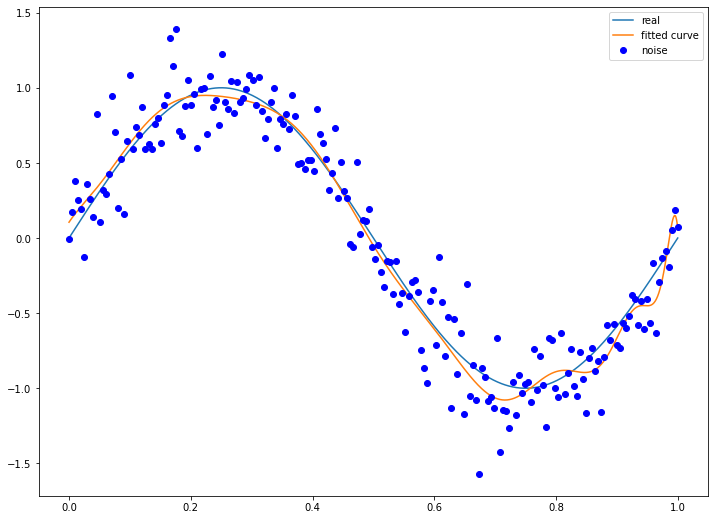

In [54]:
# M=30
p_lsq_1 = fitting(M=30)

### M=50

Fitting Parameters: [ 1.91340331e+04 -3.85833792e+04  4.59269987e+04 -8.06922132e+03
 -1.93251154e+04 -2.17438147e+04  1.50464954e+04 -1.95020746e+04
 -5.20786291e+03 -3.00013289e+02  8.10268793e+03  2.59199870e+04
  2.22137524e+04  2.27318175e+04 -1.62209968e+03 -3.40249032e+03
 -1.23404814e+04 -7.87980419e+03 -1.59534093e+04 -2.25298343e+04
 -1.78181824e+04 -1.04970564e+04  3.55059541e+03  5.32453297e+03
  1.61801583e+04  1.97988396e+04  2.12974010e+04  2.01241491e+04
 -8.37239954e+03  6.29487697e+03 -1.65022907e+04 -2.44189209e+04
 -2.25291654e+04 -1.48570779e+04  1.12964871e+04  1.88293334e+04
  2.40986221e+04  1.34545970e+04 -8.56555645e+03 -2.10742982e+04
 -1.63056652e+04  4.87431962e+03  2.13484018e+04  3.34830733e+03
 -2.07542962e+04  1.13793677e+04 -2.14618306e+03 -9.75104111e+00
  3.13666329e+01  3.30922197e+00  1.22492686e-01]


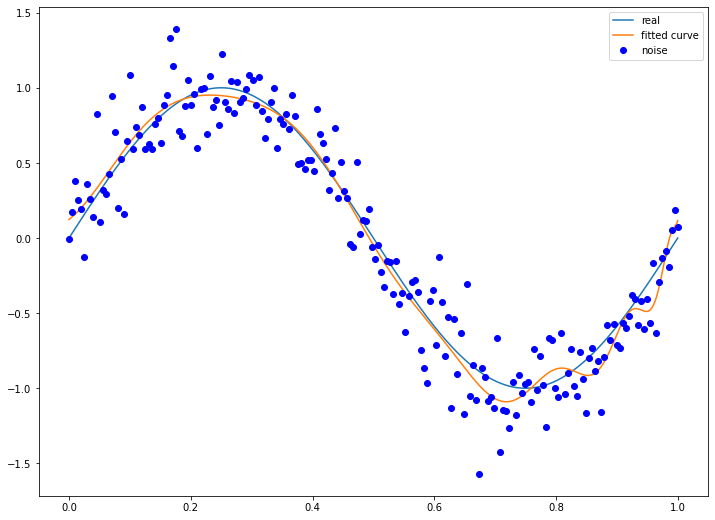

In [55]:
# M=50
p_lsq_3 = fitting(M=50)

### M=180

Fitting Parameters: [-6.67169090e+04 -2.81852987e+04 -5.99191980e+04  2.50870560e+04
  4.31618863e+04 -4.63967069e+04  9.02579763e+03  6.84530851e+02
  3.07246139e+04  3.35168552e+04  3.07860763e+04  3.96333215e+04
  1.04616110e+04  3.00948284e+04 -5.61517454e+03  3.03673332e+04
 -2.37625208e+04  4.81252044e+04  2.22760687e+04  2.25250324e+04
  2.75623407e+04  2.73105898e+04 -1.94888111e+04 -1.72174387e+04
 -1.79823592e+04 -2.88893771e+04  3.13966098e+04  3.94679497e+04
 -1.80626569e+04 -3.25413306e+04  8.18260688e+04  5.67996047e+04
 -2.60747224e+04 -5.86845937e+04 -3.15319778e+04 -4.84629622e+04
 -8.13454488e+04 -4.52766034e+04 -6.27721566e+04 -3.28008575e+04
 -4.68537772e+04  5.01342699e+04 -5.84929375e+04 -3.06239495e+04
 -1.71961098e+04 -2.88497160e+04 -1.93326065e+04  5.16351342e+04
 -2.57508735e+04 -3.95759675e+04  1.56463548e+03  1.68853226e+04
 -3.99148123e+03 -8.91094049e+03 -3.26339798e+04  4.02365431e+04
  1.45693270e+04  4.23600694e+04  3.36712769e+04  5.53041573e+03
  4.4

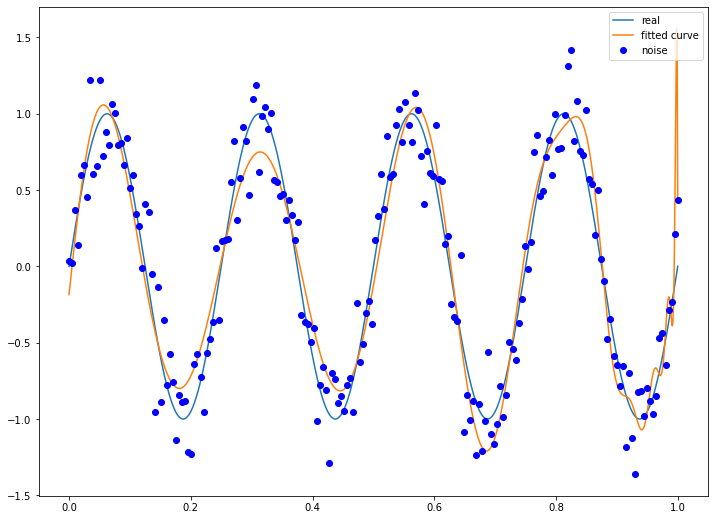

In [50]:
# M=180
p_lsq_9 = fitting(M=180)

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [34]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [39]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

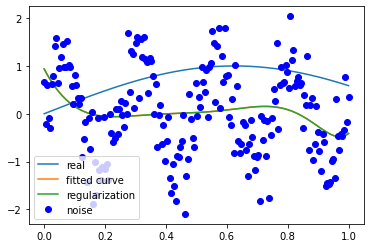

In [42]:
plt.plot(x_points, real_func(x_points, freq=0.8), label='real')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()